# Preparation

In [1]:
import torch
torch.__version__

'2.3.0a0+6ddf5cf85e.nv24.04'

In [2]:
import os
import pandas as pd
import numpy as np
import random
from torch import nn

from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

from model import *
from dataset import *
from train import *

In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [4]:
BATCH_SIZE = 256
NUMEPOCHS = 50

In [5]:
# import pandas as pd
# df = pd.read_csv("Data/ml-1m.train.rating",sep='\t', header=None, names=['uid', 'mid', 'rating', 'timestamp'], engine='python')
# df

In [6]:
# df2 = pd.read_csv("Data/ml-1m.test.negative",sep = "\t",header=None)
# df2

# Trian and Test

### Compare the three methods 

In [7]:
# model_config_mf = {
#     "model_mark": "gmf(mf_dim=8)",
#     'embedding_dim_mf': 8,
#     # "mlp_layers(X)" : 0,
#     # 'mlp_layers': [ 32, 16, 8],
#     'model_type': 'GMF'     #　MLP, NeuMF
# }

# model_config_mlp = {
#     "model_mark": "mlp(mlp_layer=3)",
#     "mlp_layers(X)" : 3,
#     'mlp_layers': [64, 32, 16, 8],
#     'model_type': 'MLP'     #　MLP, NeuMF
# }

# model_config_neumf = {
#     "model_mark": "neumf(mf_dim=8,mlp_layer=3)",
#     'embedding_dim_mf': 8,
#     "mlp_layers(X)" : 3,
#     'mlp_layers': [64, 32, 16, 8],
#     'model_type': 'NeuMF'     #　MLP, NeuMF
# }

# model_train(model_config_mf, seed = 42, num_of_negatives=4, num_of_epochs = 40)


In [8]:
# model_train(model_config_mlp, seed = 42, num_of_negatives=4, num_of_epochs=40)


In [9]:
# model_train(model_config_neumf, seed = 42, num_of_negatives=4, num_of_epochs=40)


for movielens

HR, NDCG

-   GMF(Factor-8, X-0): 0.6339, 0.3621
-   MLP(Factor-8, X-3): 0.6109, 0.3434
-   NeuMF(Factor-8, X-3): 0.6474, 0.3731

## Reproduce the ablation study --- MLP with different layers

 K: 8
 
 layers (X): 0, 1, 2, 3, 4

In [10]:
model_config_mlp0 = {
    "model_mark": "mlp(mlp_layer=0)",
    "mlp_layers(X)" : 0,
    'mlp_layers': [8],
    'model_type': 'MLP'     #　MLP, NeuMF
}

model_config_mlp1 = {
    "model_mark": "mlp(mlp_layer=1)",
    "mlp_layers(X)" : 1,
    'mlp_layers': [16,8],
    'model_type': 'MLP'     #　MLP, NeuMF
}

#! [8][:-1],[8][1:]    # ([], [])
#! [8,16][:-1],[8,16][1:]  # ([8], [16])

model_config_mlp2 = {
    "model_mark": "mlp(mlp_layer=2)",
    "mlp_layers(X)" : 2,
    'mlp_layers': [32,16, 8],
    'model_type': 'MLP'     #　MLP, NeuMF
}

model_config_mlp3 = {
    "model_mark": "mlp(mlp_layer=3)",
    "mlp_layers(X)" : 3,
    'mlp_layers': [64,32, 16, 8],
    'model_type': 'MLP'     #　MLP, NeuMF
}

model_config_mlp4 = {
    "model_mark": "mlp(mlp_layer=4)",
    "mlp_layers(X)" : 4,
    'mlp_layers': [128,64, 32, 16, 8],
    'model_type': 'MLP'     #　MLP, NeuMF
}

# model_train(model_config_mlp0, seed = 42, num_of_negatives=4, num_of_epochs=40)


In [11]:
model_train(model_config_mlp1, seed = 42, num_of_negatives=4, num_of_epochs=40)


Using cuda device
Loading preprocessed data from preprocessed_data/ml.pkl
------------------------------------------------------------
config of model: 
 {'model_mark': 'mlp(mlp_layer=1)', 'mlp_layers(X)': 1, 'mlp_layers': [16, 8], 'model_type': 'MLP', 'num_users': 6040, 'num_items': 3706}
RecommenderModel(
  (embedding_user_mlp): Embedding(6040, 8)
  (embedding_item_mlp): Embedding(3706, 8)
  (fc_layers): ModuleList(
    (0): Linear(in_features=16, out_features=8, bias=True)
  )
  (linear_mlp): Linear(in_features=8, out_features=1, bias=False)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
------------------------------------------------------------


  2%|▎         | 1/40 [01:02<40:46, 62.73s/it]

Epoch 1, Loss: 0.0015, HR@10: 0.4523, NDCG@10: 0.2499


  5%|▌         | 2/40 [02:05<39:42, 62.69s/it]

Epoch 2, Loss: 0.0014, HR@10: 0.4508, NDCG@10: 0.2501


  8%|▊         | 3/40 [03:09<39:02, 63.31s/it]

Epoch 3, Loss: 0.0014, HR@10: 0.4522, NDCG@10: 0.2521


 10%|█         | 4/40 [04:12<37:54, 63.17s/it]

Epoch 4, Loss: 0.0014, HR@10: 0.4545, NDCG@10: 0.2534


 12%|█▎        | 5/40 [05:15<36:47, 63.07s/it]

Epoch 5, Loss: 0.0014, HR@10: 0.4518, NDCG@10: 0.2520


 15%|█▌        | 6/40 [06:16<35:27, 62.58s/it]

Epoch 6, Loss: 0.0014, HR@10: 0.4556, NDCG@10: 0.2551


 18%|█▊        | 7/40 [07:21<34:42, 63.10s/it]

Epoch 7, Loss: 0.0014, HR@10: 0.4573, NDCG@10: 0.2549


 20%|██        | 8/40 [08:22<33:25, 62.68s/it]

Epoch 8, Loss: 0.0014, HR@10: 0.4598, NDCG@10: 0.2579


 22%|██▎       | 9/40 [09:28<32:48, 63.49s/it]

Epoch 9, Loss: 0.0014, HR@10: 0.4634, NDCG@10: 0.2588


 25%|██▌       | 10/40 [10:31<31:46, 63.55s/it]

Epoch 10, Loss: 0.0014, HR@10: 0.4662, NDCG@10: 0.2601


 28%|██▊       | 11/40 [11:34<30:32, 63.19s/it]

Epoch 11, Loss: 0.0013, HR@10: 0.4709, NDCG@10: 0.2624


 30%|███       | 12/40 [12:35<29:12, 62.58s/it]

Epoch 12, Loss: 0.0013, HR@10: 0.4775, NDCG@10: 0.2651


 32%|███▎      | 13/40 [13:37<28:04, 62.39s/it]

Epoch 13, Loss: 0.0013, HR@10: 0.4803, NDCG@10: 0.2667


 35%|███▌      | 14/40 [14:41<27:13, 62.81s/it]

Epoch 14, Loss: 0.0013, HR@10: 0.4820, NDCG@10: 0.2675


 38%|███▊      | 15/40 [15:44<26:12, 62.90s/it]

Epoch 15, Loss: 0.0013, HR@10: 0.4854, NDCG@10: 0.2704


 40%|████      | 16/40 [16:48<25:16, 63.17s/it]

Epoch 16, Loss: 0.0013, HR@10: 0.4904, NDCG@10: 0.2714


 42%|████▎     | 17/40 [17:49<24:02, 62.72s/it]

Epoch 17, Loss: 0.0013, HR@10: 0.4916, NDCG@10: 0.2740


 45%|████▌     | 18/40 [18:53<23:08, 63.13s/it]

Epoch 18, Loss: 0.0013, HR@10: 0.4967, NDCG@10: 0.2748


 48%|████▊     | 19/40 [19:45<20:54, 59.74s/it]

Epoch 19, Loss: 0.0013, HR@10: 0.4972, NDCG@10: 0.2752


 50%|█████     | 20/40 [20:17<17:10, 51.50s/it]

Epoch 20, Loss: 0.0013, HR@10: 0.5007, NDCG@10: 0.2775


 52%|█████▎    | 21/40 [20:49<14:26, 45.62s/it]

Epoch 21, Loss: 0.0013, HR@10: 0.5010, NDCG@10: 0.2798


 55%|█████▌    | 22/40 [21:34<13:36, 45.34s/it]

Epoch 22, Loss: 0.0013, HR@10: 0.5028, NDCG@10: 0.2785


 57%|█████▊    | 23/40 [22:37<14:20, 50.60s/it]

Epoch 23, Loss: 0.0013, HR@10: 0.5022, NDCG@10: 0.2794


 60%|██████    | 24/40 [23:39<14:23, 53.96s/it]

Epoch 24, Loss: 0.0013, HR@10: 0.5040, NDCG@10: 0.2816


 62%|██████▎   | 25/40 [24:41<14:06, 56.43s/it]

Epoch 25, Loss: 0.0013, HR@10: 0.5070, NDCG@10: 0.2828


 65%|██████▌   | 26/40 [25:44<13:38, 58.43s/it]

Epoch 26, Loss: 0.0013, HR@10: 0.5093, NDCG@10: 0.2838


 68%|██████▊   | 27/40 [26:46<12:52, 59.41s/it]

Epoch 27, Loss: 0.0013, HR@10: 0.5060, NDCG@10: 0.2837


 70%|███████   | 28/40 [27:48<12:04, 60.36s/it]

Epoch 28, Loss: 0.0013, HR@10: 0.5053, NDCG@10: 0.2826


 72%|███████▎  | 29/40 [28:53<11:17, 61.58s/it]

Epoch 29, Loss: 0.0013, HR@10: 0.5104, NDCG@10: 0.2847


 75%|███████▌  | 30/40 [29:57<10:23, 62.35s/it]

Epoch 30, Loss: 0.0013, HR@10: 0.5103, NDCG@10: 0.2848


 78%|███████▊  | 31/40 [31:01<09:27, 63.05s/it]

Epoch 31, Loss: 0.0013, HR@10: 0.5099, NDCG@10: 0.2858


 80%|████████  | 32/40 [32:06<08:27, 63.44s/it]

Epoch 32, Loss: 0.0013, HR@10: 0.5137, NDCG@10: 0.2870


 82%|████████▎ | 33/40 [33:10<07:25, 63.58s/it]

Epoch 33, Loss: 0.0013, HR@10: 0.5151, NDCG@10: 0.2868


 85%|████████▌ | 34/40 [34:11<06:17, 62.93s/it]

Epoch 34, Loss: 0.0013, HR@10: 0.5154, NDCG@10: 0.2864


 88%|████████▊ | 35/40 [35:15<05:16, 63.25s/it]

Epoch 35, Loss: 0.0013, HR@10: 0.5144, NDCG@10: 0.2873


 90%|█████████ | 36/40 [36:16<04:10, 62.63s/it]

Epoch 36, Loss: 0.0013, HR@10: 0.5151, NDCG@10: 0.2862


 92%|█████████▎| 37/40 [37:19<03:08, 62.68s/it]

Epoch 37, Loss: 0.0013, HR@10: 0.5174, NDCG@10: 0.2884


 95%|█████████▌| 38/40 [38:20<02:04, 62.10s/it]

Epoch 38, Loss: 0.0013, HR@10: 0.5197, NDCG@10: 0.2901


 98%|█████████▊| 39/40 [39:23<01:02, 62.46s/it]

Epoch 39, Loss: 0.0013, HR@10: 0.5194, NDCG@10: 0.2903


100%|██████████| 40/40 [40:24<00:00, 60.60s/it]

Epoch 40, Loss: 0.0013, HR@10: 0.5190, NDCG@10: 0.2911
Best HR: 0.5197019867549669, Best NDCG: 0.290055191343265 at Epoch 37


In [21]:
model_train(model_config_mlp2, seed = 42, num_of_negatives=4, num_of_epochs=40)


Using cuda device
Loading preprocessed data from preprocessed_data/ml.pkl
------------------------------------------------------------
config of model: 
 {'model_mark': 'mlp(mlp_layer=2)', 'mlp_layers(X)': 2, 'mlp_layers': [32, 16, 8], 'model_type': 'MLP', 'num_users': 6040, 'num_items': 3706}
RecommenderModel(
  (embedding_user_mlp): Embedding(6040, 16)
  (embedding_item_mlp): Embedding(3706, 16)
  (fc_layers): ModuleList(
    (0): Linear(in_features=32, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=8, bias=True)
  )
  (linear_mlp): Linear(in_features=8, out_features=1, bias=False)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
------------------------------------------------------------


  2%|▎         | 1/40 [01:24<54:51, 84.40s/it]

Epoch 1, Loss: 0.0015, HR@10: 0.4434, NDCG@10: 0.2497


  5%|▌         | 2/40 [02:49<53:50, 85.02s/it]

Epoch 2, Loss: 0.0014, HR@10: 0.4515, NDCG@10: 0.2518


  8%|▊         | 3/40 [04:14<52:21, 84.90s/it]

Epoch 3, Loss: 0.0014, HR@10: 0.4545, NDCG@10: 0.2537


 10%|█         | 4/40 [05:43<51:49, 86.37s/it]

Epoch 4, Loss: 0.0014, HR@10: 0.4624, NDCG@10: 0.2574


 12%|█▎        | 5/40 [07:06<49:44, 85.28s/it]

Epoch 5, Loss: 0.0013, HR@10: 0.4829, NDCG@10: 0.2651


 15%|█▌        | 6/40 [08:18<45:47, 80.81s/it]

Epoch 6, Loss: 0.0013, HR@10: 0.4911, NDCG@10: 0.2717


 18%|█▊        | 7/40 [09:26<42:07, 76.59s/it]

Epoch 7, Loss: 0.0013, HR@10: 0.5005, NDCG@10: 0.2741


 20%|██        | 8/40 [10:06<34:38, 64.96s/it]

Epoch 8, Loss: 0.0013, HR@10: 0.5070, NDCG@10: 0.2787


 22%|██▎       | 9/40 [11:32<36:57, 71.53s/it]

Epoch 9, Loss: 0.0013, HR@10: 0.5132, NDCG@10: 0.2842


 25%|██▌       | 10/40 [12:53<37:11, 74.37s/it]

Epoch 10, Loss: 0.0012, HR@10: 0.5129, NDCG@10: 0.2839


 28%|██▊       | 11/40 [14:15<37:07, 76.83s/it]

Epoch 11, Loss: 0.0012, HR@10: 0.5242, NDCG@10: 0.2899


 30%|███       | 12/40 [15:37<36:33, 78.33s/it]

Epoch 12, Loss: 0.0012, HR@10: 0.5263, NDCG@10: 0.2924


 32%|███▎      | 13/40 [17:02<36:09, 80.37s/it]

Epoch 13, Loss: 0.0012, HR@10: 0.5275, NDCG@10: 0.2976


 35%|███▌      | 14/40 [18:29<35:40, 82.33s/it]

Epoch 14, Loss: 0.0012, HR@10: 0.5301, NDCG@10: 0.2975


 38%|███▊      | 15/40 [19:51<34:17, 82.30s/it]

Epoch 15, Loss: 0.0012, HR@10: 0.5412, NDCG@10: 0.3031


 40%|████      | 16/40 [21:07<32:09, 80.41s/it]

Epoch 16, Loss: 0.0012, HR@10: 0.5421, NDCG@10: 0.3062


 42%|████▎     | 17/40 [22:36<31:45, 82.86s/it]

Epoch 17, Loss: 0.0012, HR@10: 0.5439, NDCG@10: 0.3069


 45%|████▌     | 18/40 [24:04<30:58, 84.46s/it]

Epoch 18, Loss: 0.0012, HR@10: 0.5478, NDCG@10: 0.3064


 48%|████▊     | 19/40 [25:28<29:33, 84.46s/it]

Epoch 19, Loss: 0.0012, HR@10: 0.5588, NDCG@10: 0.3112


 50%|█████     | 20/40 [26:49<27:46, 83.32s/it]

Epoch 20, Loss: 0.0012, HR@10: 0.5533, NDCG@10: 0.3090


 52%|█████▎    | 21/40 [28:13<26:26, 83.52s/it]

Epoch 21, Loss: 0.0012, HR@10: 0.5518, NDCG@10: 0.3075


 55%|█████▌    | 22/40 [29:34<24:50, 82.78s/it]

Epoch 22, Loss: 0.0012, HR@10: 0.5579, NDCG@10: 0.3101


 57%|█████▊    | 23/40 [30:59<23:37, 83.41s/it]

Epoch 23, Loss: 0.0012, HR@10: 0.5616, NDCG@10: 0.3128


 60%|██████    | 24/40 [32:24<22:24, 84.01s/it]

Epoch 24, Loss: 0.0012, HR@10: 0.5632, NDCG@10: 0.3139


 62%|██████▎   | 25/40 [33:50<21:05, 84.35s/it]

Epoch 25, Loss: 0.0012, HR@10: 0.5667, NDCG@10: 0.3159


 65%|██████▌   | 26/40 [35:12<19:33, 83.82s/it]

Epoch 26, Loss: 0.0012, HR@10: 0.5637, NDCG@10: 0.3134


 68%|██████▊   | 27/40 [36:36<18:09, 83.80s/it]

Epoch 27, Loss: 0.0012, HR@10: 0.5649, NDCG@10: 0.3134


 70%|███████   | 28/40 [38:01<16:49, 84.15s/it]

Epoch 28, Loss: 0.0011, HR@10: 0.5644, NDCG@10: 0.3135


 72%|███████▎  | 29/40 [39:32<15:47, 86.11s/it]

Epoch 29, Loss: 0.0011, HR@10: 0.5581, NDCG@10: 0.3146


 75%|███████▌  | 30/40 [40:57<14:20, 86.04s/it]

Epoch 30, Loss: 0.0011, HR@10: 0.5598, NDCG@10: 0.3126


 78%|███████▊  | 31/40 [42:23<12:53, 85.95s/it]

Epoch 31, Loss: 0.0011, HR@10: 0.5642, NDCG@10: 0.3130


 80%|████████  | 32/40 [43:46<11:19, 84.96s/it]

Epoch 32, Loss: 0.0011, HR@10: 0.5657, NDCG@10: 0.3153


 82%|████████▎ | 33/40 [45:11<09:55, 85.08s/it]

Epoch 33, Loss: 0.0011, HR@10: 0.5657, NDCG@10: 0.3162


 85%|████████▌ | 34/40 [46:38<08:33, 85.52s/it]

Epoch 34, Loss: 0.0011, HR@10: 0.5722, NDCG@10: 0.3183


 88%|████████▊ | 35/40 [48:03<07:07, 85.50s/it]

Epoch 35, Loss: 0.0011, HR@10: 0.5732, NDCG@10: 0.3189


 90%|█████████ | 36/40 [49:27<05:39, 84.91s/it]

Epoch 36, Loss: 0.0011, HR@10: 0.5637, NDCG@10: 0.3150


 92%|█████████▎| 37/40 [50:53<04:16, 85.47s/it]

Epoch 37, Loss: 0.0011, HR@10: 0.5710, NDCG@10: 0.3163


 95%|█████████▌| 38/40 [52:17<02:49, 84.79s/it]

Epoch 38, Loss: 0.0011, HR@10: 0.5675, NDCG@10: 0.3185


 98%|█████████▊| 39/40 [53:40<01:24, 84.30s/it]

Epoch 39, Loss: 0.0011, HR@10: 0.5710, NDCG@10: 0.3185


100%|██████████| 40/40 [55:05<00:00, 82.64s/it]

Epoch 40, Loss: 0.0011, HR@10: 0.5745, NDCG@10: 0.3196
Best HR: 0.5745033112582781, Best NDCG: 0.3196460867153938 at Epoch 39


In [22]:
model_train(model_config_mlp3, seed = 42, num_of_negatives=4, num_of_epochs=40)


Using cuda device
Loading preprocessed data from preprocessed_data/ml.pkl
------------------------------------------------------------
config of model: 
 {'model_mark': 'mlp(mlp_layer=3)', 'mlp_layers(X)': 3, 'mlp_layers': [64, 32, 16, 8], 'model_type': 'MLP', 'num_users': 6040, 'num_items': 3706}
RecommenderModel(
  (embedding_user_mlp): Embedding(6040, 32)
  (embedding_item_mlp): Embedding(3706, 32)
  (fc_layers): ModuleList(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=8, bias=True)
  )
  (linear_mlp): Linear(in_features=8, out_features=1, bias=False)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
------------------------------------------------------------


  2%|▎         | 1/40 [01:40<1:05:25, 100.65s/it]

Epoch 1, Loss: 0.0014, HR@10: 0.4417, NDCG@10: 0.2477


  5%|▌         | 2/40 [03:22<1:04:03, 101.15s/it]

Epoch 2, Loss: 0.0014, HR@10: 0.4543, NDCG@10: 0.2520


  8%|▊         | 3/40 [05:03<1:02:29, 101.33s/it]

Epoch 3, Loss: 0.0014, HR@10: 0.4666, NDCG@10: 0.2583


 10%|█         | 4/40 [06:45<1:01:01, 101.71s/it]

Epoch 4, Loss: 0.0013, HR@10: 0.4909, NDCG@10: 0.2705


 12%|█▎        | 5/40 [08:29<59:46, 102.46s/it]  

Epoch 5, Loss: 0.0013, HR@10: 0.5048, NDCG@10: 0.2794


 15%|█▌        | 6/40 [10:13<58:23, 103.05s/it]

Epoch 6, Loss: 0.0012, HR@10: 0.5195, NDCG@10: 0.2875


 18%|█▊        | 7/40 [11:35<52:47, 95.99s/it] 

Epoch 7, Loss: 0.0012, HR@10: 0.5300, NDCG@10: 0.2955


 20%|██        | 8/40 [12:46<46:55, 87.99s/it]

Epoch 8, Loss: 0.0012, HR@10: 0.5462, NDCG@10: 0.3037


 22%|██▎       | 9/40 [14:27<47:33, 92.04s/it]

Epoch 9, Loss: 0.0012, HR@10: 0.5593, NDCG@10: 0.3140


 25%|██▌       | 10/40 [16:08<47:24, 94.82s/it]

Epoch 10, Loss: 0.0012, HR@10: 0.5623, NDCG@10: 0.3178


 28%|██▊       | 11/40 [17:47<46:29, 96.18s/it]

Epoch 11, Loss: 0.0011, HR@10: 0.5733, NDCG@10: 0.3203


 30%|███       | 12/40 [19:18<44:11, 94.70s/it]

Epoch 12, Loss: 0.0011, HR@10: 0.5714, NDCG@10: 0.3223


 32%|███▎      | 13/40 [20:49<42:00, 93.36s/it]

Epoch 13, Loss: 0.0011, HR@10: 0.5758, NDCG@10: 0.3241


 35%|███▌      | 14/40 [22:33<41:56, 96.77s/it]

Epoch 14, Loss: 0.0011, HR@10: 0.5791, NDCG@10: 0.3264


 38%|███▊      | 15/40 [24:14<40:50, 98.00s/it]

Epoch 15, Loss: 0.0011, HR@10: 0.5806, NDCG@10: 0.3297


 40%|████      | 16/40 [25:59<39:57, 99.91s/it]

Epoch 16, Loss: 0.0011, HR@10: 0.5858, NDCG@10: 0.3308


 42%|████▎     | 17/40 [27:38<38:13, 99.73s/it]

Epoch 17, Loss: 0.0011, HR@10: 0.5922, NDCG@10: 0.3350


 45%|████▌     | 18/40 [29:23<37:07, 101.27s/it]

Epoch 18, Loss: 0.0011, HR@10: 0.5937, NDCG@10: 0.3359


 48%|████▊     | 19/40 [31:08<35:50, 102.42s/it]

Epoch 19, Loss: 0.0011, HR@10: 0.5952, NDCG@10: 0.3382


 50%|█████     | 20/40 [32:48<33:57, 101.88s/it]

Epoch 20, Loss: 0.0011, HR@10: 0.5967, NDCG@10: 0.3363


 52%|█████▎    | 21/40 [34:30<32:13, 101.75s/it]

Epoch 21, Loss: 0.0010, HR@10: 0.6025, NDCG@10: 0.3391


 55%|█████▌    | 22/40 [36:10<30:23, 101.32s/it]

Epoch 22, Loss: 0.0010, HR@10: 0.6053, NDCG@10: 0.3423


 57%|█████▊    | 23/40 [37:55<28:58, 102.27s/it]

Epoch 23, Loss: 0.0010, HR@10: 0.6003, NDCG@10: 0.3374


 60%|██████    | 24/40 [39:37<27:14, 102.18s/it]

Epoch 24, Loss: 0.0010, HR@10: 0.6012, NDCG@10: 0.3394


 62%|██████▎   | 25/40 [41:20<25:38, 102.56s/it]

Epoch 25, Loss: 0.0010, HR@10: 0.6050, NDCG@10: 0.3431


 65%|██████▌   | 26/40 [43:02<23:52, 102.30s/it]

Epoch 26, Loss: 0.0010, HR@10: 0.6003, NDCG@10: 0.3407


 68%|██████▊   | 27/40 [44:36<21:40, 100.03s/it]

Epoch 27, Loss: 0.0010, HR@10: 0.6017, NDCG@10: 0.3409


 70%|███████   | 28/40 [45:37<17:37, 88.15s/it] 

Epoch 28, Loss: 0.0010, HR@10: 0.6002, NDCG@10: 0.3411


 72%|███████▎  | 29/40 [47:20<16:59, 92.66s/it]

Epoch 29, Loss: 0.0010, HR@10: 0.5977, NDCG@10: 0.3404


 75%|███████▌  | 30/40 [49:00<15:47, 94.71s/it]

Epoch 30, Loss: 0.0010, HR@10: 0.5982, NDCG@10: 0.3419


 78%|███████▊  | 31/40 [50:40<14:28, 96.53s/it]

Epoch 31, Loss: 0.0010, HR@10: 0.6003, NDCG@10: 0.3426


In [14]:
# model_train(model_config_mlp4, seed = 42, num_of_negatives=4, num_of_epochs=40)


HR, NDCG

-   MLP0: 0.4538, 0.2525
-   MLP1: 0.5197, 0.2901
-   MLP2: 0.5745, 0.3196
-   MLP3: 0.5667, 0.3159
-   MLP4: 0.6053, 0.3423

# Plot

### 3 models

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

In [16]:
df1 = pd.DataFrame({
    "Name":["GMF","MLP","NeuMF"],
    "HR@10":[0.6339,0.6109,0.6474],
    "NDCG@10": [0.3621, 0.3434, 0.3731]
    }
)
df1 = df1.loc[:,["HR@10","NDCG@10"]].stack().reset_index().rename(columns={"level_1":"Metric",0:"Value","level_0":"Model"})
df1["Model"] = df1["Model"].map({0:"GMF",1:"MLP",2:"NeuMF"})
df1

,Model,Metric,Value
0,GMF,HR@10,0.6339
1,GMF,NDCG@10,0.3621
2,MLP,HR@10,0.6109
3,MLP,NDCG@10,0.3434
4,NeuMF,HR@10,0.6474
5,NeuMF,NDCG@10,0.3731


In [17]:
color_list = ["#10323a","#569a4d"]
custom_palette = sns.color_palette(color_list)

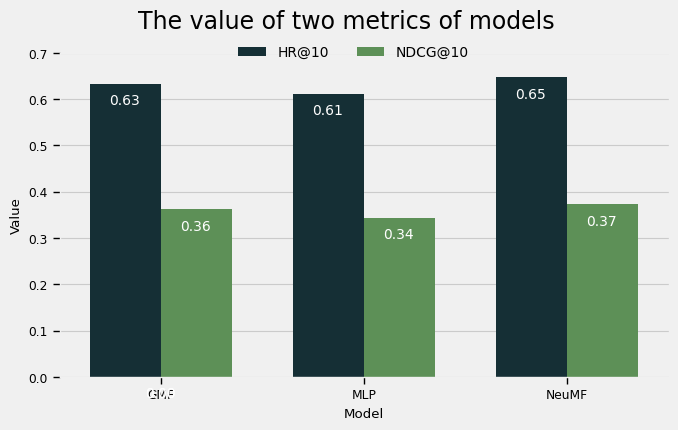

In [18]:
with plt.style.context("fivethirtyeight"), sns.plotting_context(context="paper"):
    fig = plt.figure(figsize=(7, 4))
    bar = sns.barplot(data = df1,x = 'Model', y = 'Value', hue = 'Metric',width = 0.7,palette = custom_palette)
    plt.legend(bbox_to_anchor=(0.5,0.93),loc = "upper center",ncol = 2,fontsize = 10, frameon = False,bbox_transform=fig.transFigure )
    plt.ylim(0,0.7)
    plt.title("The value of two metrics of models",fontsize = 17,x = 0.47,y = 1.05)
        # 在柱形图上标注数值
    for p in bar.patches:
        bar.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (-0.5, -12), 
                     textcoords = 'offset points',
                     fontsize = 10,
                     color = "white")
    # fig.grid(False)
    plt.show()
    fig.savefig("report/3models.svg")

### mlp layers

In [19]:
df2 = pd.DataFrame({
    "Model": ["MLP0","MLP1","MLP2","MLP3","MLP4"],
    "HR@10":[0.4538,0.5197,0.5197,3,4],
    "NDCG@10":[0.2525,0.2901,2,3,4]
})

df2 = df2.loc[:,["HR@10","NDCG@10"]].stack().reset_index().rename(columns={"level_1":"Metric",0:"Value","level_0":"Model"})
df2["Model"] = df2["Model"].map({0:"MLP0",1:"MLP1",2:"MLP2", 3:"MLP3",4:"MLP4"})
df2

,Model,Metric,Value
0,MLP0,HR@10,1
1,MLP0,NDCG@10,1
2,MLP1,HR@10,1
3,MLP1,NDCG@10,1
4,MLP2,HR@10,2
5,MLP2,NDCG@10,2
6,MLP3,HR@10,3
7,MLP3,NDCG@10,3
8,MLP4,HR@10,4
9,MLP4,NDCG@10,4


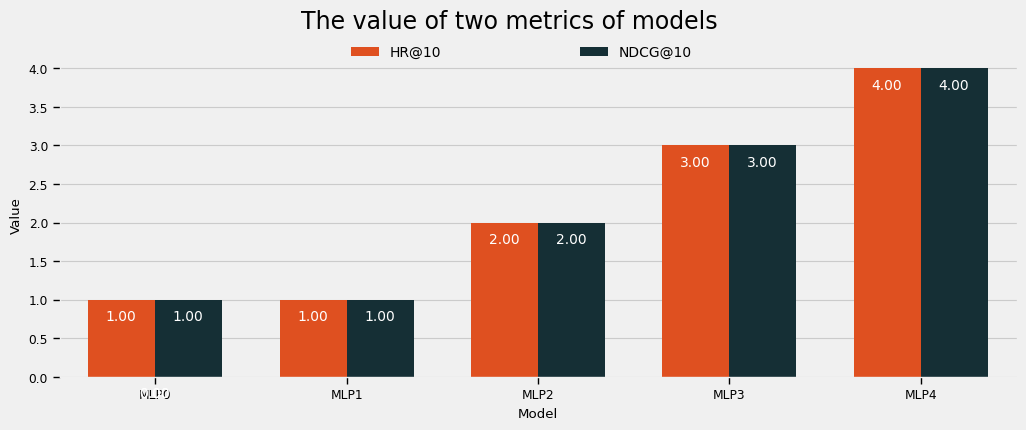

In [20]:
color_list2 = ["#ff4000","#10323a"]
custom_palette2 = sns.color_palette(color_list2)

with plt.style.context("fivethirtyeight"), sns.plotting_context(context="paper"):
    fig = plt.figure(figsize=(11, 4))
    bar = sns.barplot(data = df2,x = 'Model', y = 'Value', hue = 'Metric',width = 0.7,palette=custom_palette2)
    plt.legend(bbox_to_anchor=(0.5,0.93),loc = "upper center",ncol = 2,fontsize = 10, frameon = False,bbox_transform=fig.transFigure , columnspacing = 10)
    # plt.ylim(0,0.7)
    plt.title("The value of two metrics of models",fontsize = 17,x = 0.47,y = 1.05)
        # 在柱形图上标注数值
    for p in bar.patches:
        bar.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (-0.5, -12), 
                     textcoords = 'offset points',
                     fontsize = 10,
                     color = "white")
    plt.show()
    fig.savefig("report/MLP.svg")